In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from moviepy.editor import VideoFileClip

### Camera calibration

Before starting on finding lane lines, the camera has to be corrected for distortion. This is done by calibrating it using the checkboard squares images. The calibration uses the `cv2.calibrateCamera` function

In [1]:
def img2Gray(filename):    
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# get the list of images for calibration
images = glob.glob('camera_cal/calibration*.jpg')
img_gray = [img2Gray(x) for x in images]

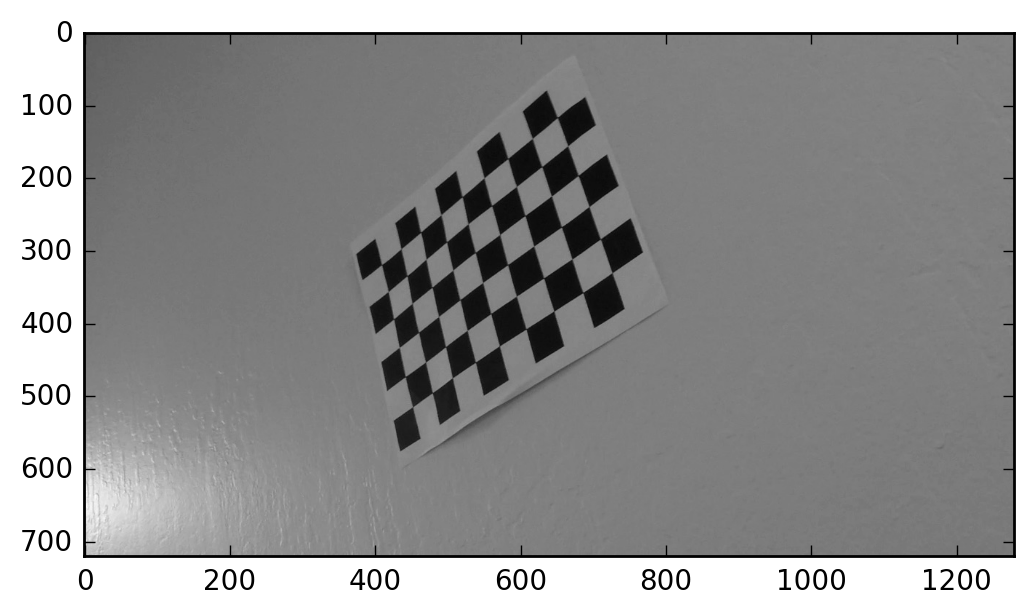

In [5]:
# quick sanity check of images:
plt.imshow(img_gray[4], cmap='gray')

#### Setting the calibration params
As can be seen from the image, the chessboard is in a 9 x 6 grid

In [6]:
chessgrid_size = (9,6)
# object points == the grid positions, image_points are positions in the image where the corners are
object_points = np.zeros((9*6 ,3), np.float32)
object_points[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

In [7]:
# find the corners in the images with cv2 findChessboardCorners function
img_points_arr = []
obj_points_arr = []
def find_corners(img, chessgridsize):
    ret, corners = cv2.findChessboardCorners(img, chessgridsize,None)
    if ret == True:
        img_points_arr.append(corners)
        obj_points_arr.append(object_points)
        
for i in range(len(img_gray)):
    find_corners(img_gray[i], chessgrid_size)

In [12]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points_arr, img_points_arr, img_gray[0].shape[::-1],None,None)
# ret == return, whether cv2 can calibratie successfully, mtx == camera matrix, 
# dist== distortion, 
#rvects/tvects==rotation vector, translation vector

In [13]:
np.save('calibrations/camera_calibration.npy', {'mtx': mtx, 'dist': dist})

---

### Correct for camera distortion

In [14]:
# reload values-- can resume from here if notebook crashes etc
camera_calibration = np.load('camera_calibration.npy').item()
dist = camera_calibration['dist']
mtx = camera_calibration['mtx']

After distortion correction, images look like so:

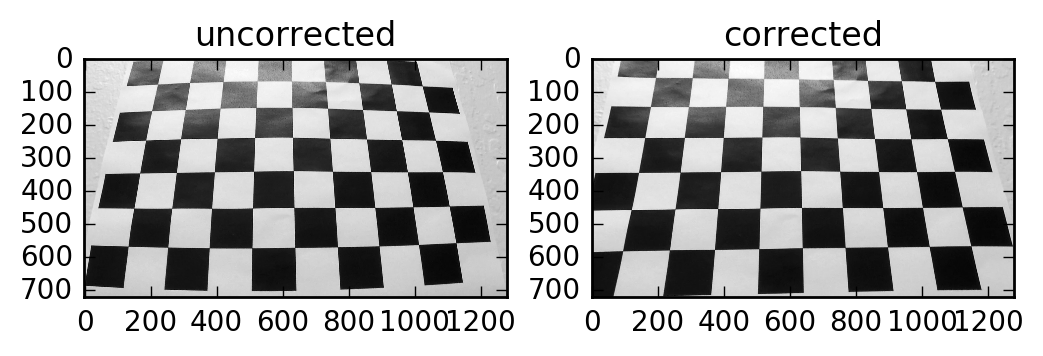

In [24]:
# undistort one of the sample images:
cal_image = img2Gray('camera_cal/calibration3.jpg')
undistorted_cal_img = cv2.undistort(cal_image, mtx, dist, None, mtx)
cv2.imwrite('output_images/calibration3_corrected.jpg',undistorted_cal_img)
plt.grid(False)
ax = plt.subplot(1,2,1)
ax.set_title('uncorrected')
ax.imshow(cal_image, cmap='gray')
ax2 = plt.subplot(1,2,2)
ax2.set_title('corrected')
ax2.imshow(undistorted_cal_img, cmap='gray')
# plt.savefig('output_images/calibration_test.jpg')